<a href="https://colab.research.google.com/github/ismailhossain254/Plant-disease-detection-using-image-processing/blob/main/nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import os
from skimage.feature import hog
from skimage.transform import rescale, resize


In [ ]:
class Transformer():
    def __init__(self, dirs: list, shape: tuple):
        self.from_path = 'data'
        self.dirs = dirs
        self.shape = shape
        self.resized_images = []
        self.y_labels = []
        self.labels = {self.dirs[index]:index for index in range(len(self.dirs))}
        self.images = [f'{self.from_path}\\{d}\\{img}' for d in self.dirs
                       for img in os.listdir(f'{self.from_path}\\{d}')
                       ]

    def transform(self):
        for scaler in [1/2, 1/3]:
            for img in self.images:
                image = io.imread(img, as_gray=True)
                scaled = rescale(image, scaler)
                resized_img = resize(scaled, self.shape)
                tr_image = hog(resized_img)
                label = img.split('\\')[1]
                self.resized_images.append(tr_image)
                self.y_labels.append(self.labels[label])
        return self.resized_images, self.y_labels


In [ ]:
t = Transformer(['Bacterial_leaf_blight', 'Brown_spot', 'Leaf_smut'], shape=(228,228))
X, y = t.transform()

In [ ]:
X[0], len(X)

(array([0.119536  , 0.06904979, 0.07501431, ..., 0.09565988, 0.11723656,
        0.08156743]),
 240)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)


In [ ]:
xtrain = np.array([image for image in X_train])
ytrain = np.array(y_train)
xtrain[0]


array([0.17344511, 0.03754656, 0.07342029, ..., 0.11180428, 0.11153699,
       0.1122979 ])

In [ ]:
xtest = np.array([image for image in X_test])
y_test = np.array(y_test)


In [ ]:
X = np.array([image for image in X])
y = np.array(y)

In [ ]:
X[0].shape, y

((54756,),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))

# Modeling

In [ ]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes=(784, 228),
                   activation='relu', verbose=2)
nn.fit(xtrain, ytrain.ravel())

Iteration 1, loss = 1.09948264
Iteration 2, loss = 7.14116918
Iteration 3, loss = 6.52176241
Iteration 4, loss = 12.21927377
Iteration 5, loss = 4.78024630
Iteration 6, loss = 3.64399139
Iteration 7, loss = 2.71311868
Iteration 8, loss = 3.49790811
Iteration 9, loss = 1.55066423
Iteration 10, loss = 0.88038689
Iteration 11, loss = 1.50246718
Iteration 12, loss = 1.35306838
Iteration 13, loss = 0.98134646
Iteration 14, loss = 0.58985235
Iteration 15, loss = 0.54956300
Iteration 16, loss = 0.70102307
Iteration 17, loss = 0.72123904
Iteration 18, loss = 0.48721493
Iteration 19, loss = 0.30002889
Iteration 20, loss = 0.31246298
Iteration 21, loss = 0.45278305
Iteration 22, loss = 0.36990070
Iteration 23, loss = 0.20858059
Iteration 24, loss = 0.16476046
Iteration 25, loss = 0.17005331
Iteration 26, loss = 0.18590783
Iteration 27, loss = 0.18185541
Iteration 28, loss = 0.15124285
Iteration 29, loss = 0.10800886
Iteration 30, loss = 0.08027076
Iteration 31, loss = 0.08100832
Iteration 32, lo

MLPClassifier(hidden_layer_sizes=(784, 228), verbose=2)

In [ ]:
ypred = nn.predict(xtest)
y_test == ypred


array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

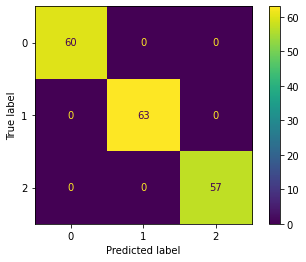

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(nn, xtrain, ytrain)


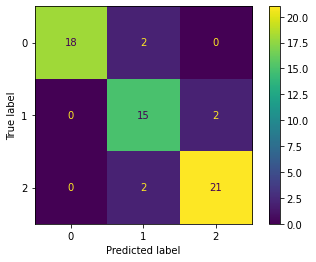

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(nn, xtest, y_test)

In [ ]:
from sklearn.metrics import f1_score, accuracy_score
f1_score(y_test, ypred, average='weighted')

0.9019005847953216

In [ ]:
accuracy_score(y_test, ypred)

0.9

In [ ]:
from joblib import dump
dump(nn2, 'NN2')

['NN2']

In [ ]:

nn2 = MLPClassifier(hidden_layer_sizes=(784, 228),
                   activation='relu', verbose=2)
nn2.fit(X, y.ravel())

Iteration 1, loss = 1.07532729
Iteration 2, loss = 6.51178680
Iteration 3, loss = 10.16212148
Iteration 4, loss = 8.15887264
Iteration 5, loss = 1.87133373
Iteration 6, loss = 2.59281439
Iteration 7, loss = 1.67529441
Iteration 8, loss = 1.41666574
Iteration 9, loss = 0.65670013
Iteration 10, loss = 0.68802676
Iteration 11, loss = 0.20235812
Iteration 12, loss = 0.45139551
Iteration 13, loss = 0.16285887
Iteration 14, loss = 0.19003219
Iteration 15, loss = 0.13781468
Iteration 16, loss = 0.10982692
Iteration 17, loss = 0.06356522
Iteration 18, loss = 0.08852724
Iteration 19, loss = 0.05228533
Iteration 20, loss = 0.02379386
Iteration 21, loss = 0.03072119
Iteration 22, loss = 0.03351915
Iteration 23, loss = 0.02034571
Iteration 24, loss = 0.01224265
Iteration 25, loss = 0.01055753
Iteration 26, loss = 0.01139537
Iteration 27, loss = 0.01165095
Iteration 28, loss = 0.01012304
Iteration 29, loss = 0.00803878
Iteration 30, loss = 0.00665882
Iteration 31, loss = 0.00579179
Iteration 32, lo

MLPClassifier(hidden_layer_sizes=(784, 228), verbose=2)

In [ ]:
nn2.predict(xtest) == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [ ]:
nn2

MLPClassifier(hidden_layer_sizes=(784, 228), verbose=2)

In [ ]:
from sklearn.svm import SVC

svm = SVC().fit(xtrain, ytrain.ravel())

In [ ]:
ypred = svm.predict(xtest)


In [ ]:
from sklearn.metrics import f1_score, accuracy_score
f1_score(y_test, ypred, average='weighted')

1.0

In [ ]:
svm = SVC().fit(X, y.ravel())

In [ ]:
dump(svm, 'SVC')

['SVC']

In [ ]:
class Preprocessor():
    def __init__(self, path: str):
        self.from_path = path

    def transform(self):
        image = io.imread(self.from_path, as_gray=True)
        scaled = rescale(image, 1/3)
        resized_img = resize(scaled, (228, 228))
        tr_image = hog(resized_img)
        return tr_image


In [ ]:
Preprocessor(r'.\data\Bacterial_leaf_blight\DSC_0365.JPG').transform().shape

(54756,)